
# EV Market Analysis — Final Insights & Modeling
**Dataset:** `electric_vehicles_spec_2025.csv`  
This notebook consolidates preprocessing, EDA, feature engineering, and modeling (regression, classification, clustering, association rules) for Deliverable 4.


In [1]:

# Core
import pandas as pd
import numpy as np
import os

# Visualization (Note: using matplotlib only)
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.cluster import KMeans

# Association Rules
from mlxtend.frequent_patterns import apriori, association_rules

# Utility
import warnings
warnings.filterwarnings('ignore')


## 1. Load Dataset

In [2]:

DATA_PATH = "electric_vehicles_spec_2025.csv.csv"  # ensure file is placed alongside this notebook
assert os.path.exists(DATA_PATH), f"Dataset not found at {DATA_PATH}. Please add the file and re-run."
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
display(df.head())
display(df.describe(include='all').T)


Shape: (478, 22)


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,478,59,Mercedes-Benz,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,477,477,X Privilege AWD (MY25),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top_speed_kmh,478.0,NaN,NaN,NaN,185.487448,34.252773,125.0,160.0,180.0,201.0,325.0
battery_capacity_kWh,478.0,NaN,NaN,NaN,74.043724,20.331058,21.3,60.0,76.15,90.6,118.0
battery_type,478,1,Lithium-ion,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_cells,276.0,NaN,NaN,NaN,485.293478,1210.819733,72.0,150.0,216.0,324.0,7920.0
torque_nm,471.0,NaN,NaN,NaN,498.012739,241.461128,113.0,305.0,430.0,679.0,1350.0
efficiency_wh_per_km,478.0,NaN,NaN,NaN,162.903766,34.317532,109.0,143.0,155.0,177.75,370.0
range_km,478.0,NaN,NaN,NaN,393.179916,103.287335,135.0,320.0,397.5,470.0,685.0
acceleration_0_100_s,478.0,NaN,NaN,NaN,6.882636,2.730696,2.2,4.8,6.6,8.2,19.1


## 2. Basic Cleaning & Type Fixes

In [3]:

# Standardize column names
df.columns = [c.strip().lower().replace('.', '_').replace(' ', '_') for c in df.columns]

# Inspect dtypes
print(df.dtypes)

# Convert numerics where possible
numeric_cols = [
    'top_speed_kmh','battery_capacity_kwh','number_of_cells','torque_nm','efficiency_wh_per_km',
    'range_km','acceleration_0_100_s','towing_capacity_kg','cargo_volume_l','seats',
    'length_mm','width_mm','height_mm'
]
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Strip whitespace in object cols
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()

print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))


brand                         object
model                         object
top_speed_kmh                  int64
battery_capacity_kwh         float64
battery_type                  object
number_of_cells              float64
torque_nm                    float64
efficiency_wh_per_km           int64
range_km                       int64
acceleration_0_100_s         float64
fast_charging_power_kw_dc    float64
fast_charge_port              object
towing_capacity_kg           float64
cargo_volume_l                object
seats                          int64
drivetrain                    object
segment                       object
length_mm                      int64
width_mm                       int64
height_mm                      int64
car_body_type                 object
source_url                    object
dtype: object

Missing values per column:
number_of_cells              202
towing_capacity_kg            26
torque_nm                      7
cargo_volume_l                 4
fast_chargin

## 3. Feature Engineering

In [4]:

# Example engineered features
if set(['torque_nm','length_mm']).issubset(df.columns):
    df['torque_per_m'] = df['torque_nm'] / (df['length_mm'] / 1000.0)
else:
    df['torque_per_m'] = np.nan

# Range category
if 'range_km' in df.columns:
    df['range_band'] = pd.cut(df['range_km'], bins=[0,300,450,10000], labels=['short','medium','long'])

# Efficiency score (lower Wh/km is better) -> invert and scale
if 'efficiency_wh_per_km' in df.columns:
    eff = df['efficiency_wh_per_km']
    df['efficiency_score'] = (eff.max() - eff) / (eff.max() - eff.min())

display(df.head())


,brand,model,top_speed_kmh,battery_capacity_kwh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url,torque_per_m,range_band,efficiency_score
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...,63.980397,short,0.819923
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...,63.980397,short,0.846743
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...,82.397898,short,0.812261
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...,82.397898,short,0.812261
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5,66.239316,medium,0.819923


## 4. Exploratory Data Analysis (EDA)

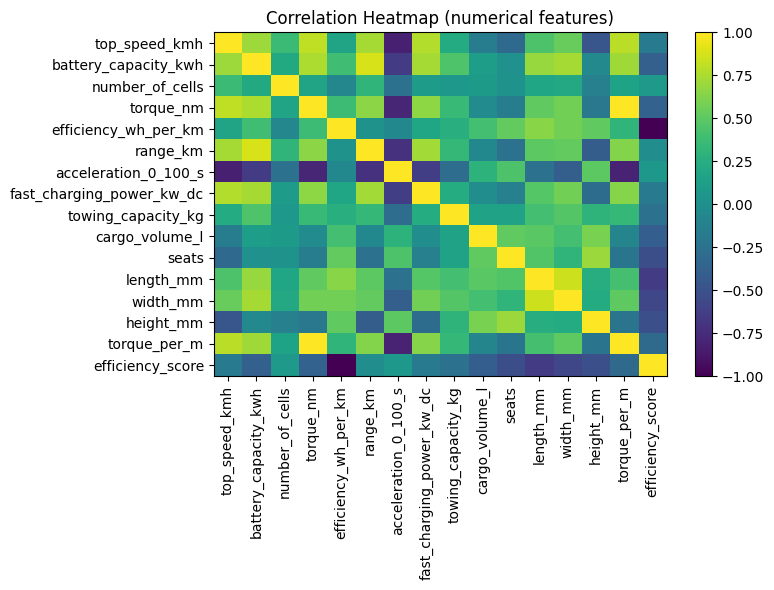

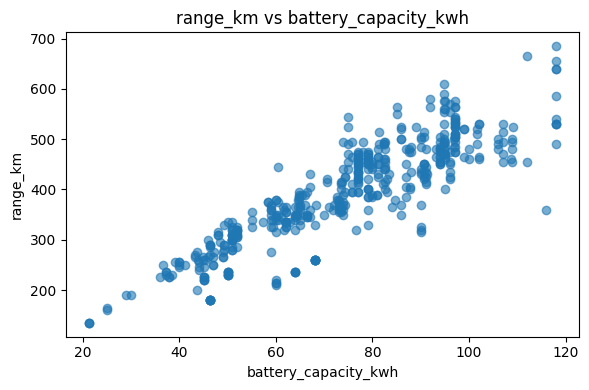

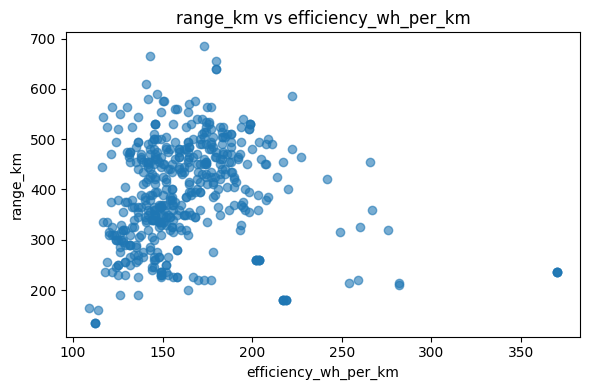

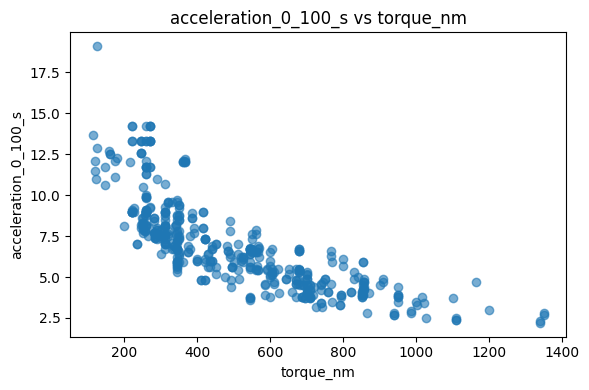

In [5]:

# Correlation heatmap (numerical)
num_df = df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')
corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.title('Correlation Heatmap (numerical features)')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout()
plt.show()

# Key scatter plots
def scatter_plot(x, y):
    if x in df.columns and y in df.columns:
        plt.figure(figsize=(6,4))
        plt.scatter(df[x], df[y], alpha=0.6)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f'{y} vs {x}')
        plt.tight_layout()
        plt.show()

scatter_plot('battery_capacity_kwh','range_km')
scatter_plot('efficiency_wh_per_km','range_km')
scatter_plot('torque_nm','acceleration_0_100_s')


## 5. Regression — Predicting `range_km`

RandomForest (best) R2: 0.954
RandomForest (best) RMSE: 21.98
RandomForest (best) MAE: 15.59
SVR R2: 0.353 RMSE: 82.74


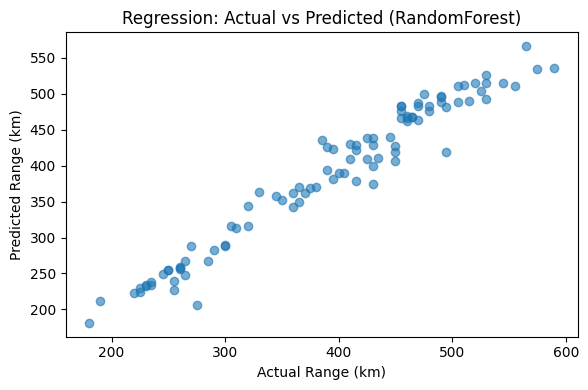

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Target and features
target_reg = 'range_km'
features_reg = [c for c in df.columns if c != target_reg]

# Separate predictors and target
X = df[features_reg].copy()
y = df[target_reg].copy()

# Drop missing target values
mask = y.notna()
X, y = X[mask], y[mask]

# Split numeric and categorical features
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

# Pipelines
rf_reg = Pipeline(steps=[('preprocess', preprocess),
                        ('model', RandomForestRegressor(random_state=42))])

svr_reg = Pipeline(steps=[('preprocess', preprocess),
                         ('model', SVR())])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for Random Forest
param_grid = {
    'model__n_estimators': [150, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_leaf': [1, 3, 5]
}
grid = GridSearchCV(
    Pipeline(steps=[('preprocess', preprocess), ('model', RandomForestRegressor(random_state=42))]),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)
grid.fit(X_train, y_train)

# Best RF model
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # fixed RMSE
rf_mae = mean_absolute_error(y_test, y_pred)

print("RandomForest (best) R2:", round(rf_r2, 3))
print("RandomForest (best) RMSE:", round(rf_rmse, 2))
print("RandomForest (best) MAE:", round(rf_mae, 2))

# SVR baseline
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
svr_r2 = r2_score(y_test, y_pred_svr)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))   # fixed RMSE
print("SVR R2:", round(svr_r2, 3), "RMSE:", round(svr_rmse, 2))

# Plot predictions vs actuals
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Range (km)')
plt.ylabel('Predicted Range (km)')
plt.title('Regression: Actual vs Predicted (RandomForest)')
plt.tight_layout()
plt.show()


## 6. Classification — Predicting `car_body_type`

RandomForestClassifier Accuracy: 0.885
                     precision    recall  f1-score   support

          Cabriolet       0.00      0.00      0.00         1
          Hatchback       0.83      0.83      0.83        12
     Liftback Sedan       0.83      0.71      0.77         7
                SUV       0.98      0.98      0.98        49
              Sedan       0.85      0.85      0.85        13
Small Passenger Van       1.00      1.00      1.00         9
     Station/Estate       0.40      0.40      0.40         5

           accuracy                           0.89        96
          macro avg       0.70      0.68      0.69        96
       weighted avg       0.89      0.89      0.89        96



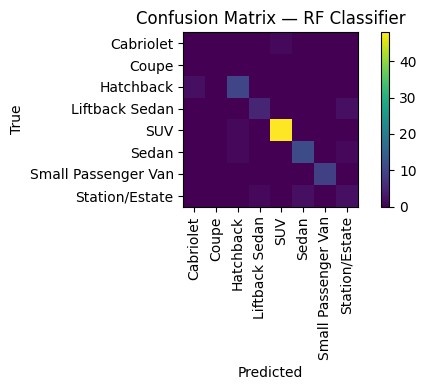

In [7]:

target_clf = 'car_body_type'
assert target_clf in df.columns, "car_body_type column not found in dataset"

Xc = df.drop(columns=[target_clf]).copy()
yc = df[target_clf].copy()

mask = yc.notna()
Xc, yc = Xc[mask], yc[mask]

num_features_c = Xc.select_dtypes(include=[np.number]).columns.tolist()
cat_features_c = Xc.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer_c = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer_c = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess_c = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_c, num_features_c),
        ('cat', categorical_transformer_c, cat_features_c)
    ]
)

rf_clf = Pipeline(steps=[('preprocess', preprocess_c),
                        ('model', RandomForestClassifier(random_state=42))])

svc_clf = Pipeline(steps=[('preprocess', preprocess_c),
                         ('model', SVC(probability=True, random_state=42))])

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42, stratify=yc)

rf_clf.fit(Xc_train, yc_train)
pred_rf = rf_clf.predict(Xc_test)
acc_rf = accuracy_score(yc_test, pred_rf)
print("RandomForestClassifier Accuracy:", round(acc_rf, 3))
print(classification_report(yc_test, pred_rf))

# Confusion matrix
cm = confusion_matrix(yc_test, pred_rf, labels=sorted(yc.unique()))
fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(cm)
ax.set_title('Confusion Matrix — RF Classifier')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticks(range(len(sorted(yc.unique())))); ax.set_xticklabels(sorted(yc.unique()), rotation=90)
ax.set_yticks(range(len(sorted(yc.unique())))); ax.set_yticklabels(sorted(yc.unique()))
plt.colorbar(im)
plt.tight_layout()
plt.show()


## 7. Clustering — KMeans Segmentation

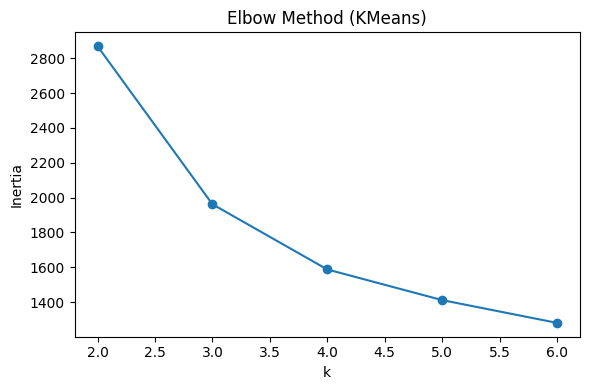

,top_speed_kmh,battery_capacity_kwh,efficiency_wh_per_km,range_km,acceleration_0_100_s,cargo_volume_l,length_mm,width_mm,height_mm
cluster,,,,,,,,,
0,177.770053,70.593048,148.866310,395.935829,6.790374,469.919786,4592.737968,1865.181818,1587.101604
1,138.844444,59.846667,213.866667,244.000000,11.817778,899.888889,4993.222222,1927.622222,1879.200000
2,219.378698,93.982840,177.295858,482.662722,4.714201,485.502959,4946.810651,1950.189349,1565.846154
3,155.506849,44.867123,133.000000,270.890411,9.052055,324.246575,4072.260274,1770.821918,1538.328767


In [8]:

# Select relevant numeric features for clustering
cluster_features = ['top_speed_kmh','battery_capacity_kwh','efficiency_wh_per_km','range_km',
                    'acceleration_0_100_s','cargo_volume_l','length_mm','width_mm','height_mm']
cluster_features = [f for f in cluster_features if f in df.columns]

clu_df = df[cluster_features].copy()
clu_df = clu_df.dropna()
scaler = StandardScaler()
clu_X = scaler.fit_transform(clu_df)

# Elbow-ish heuristic
inertias = []
K = list(range(2, 7))
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(clu_X)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method (KMeans)')
plt.tight_layout()
plt.show()

# Fit final KMeans (choose 4 as a reasonable default)
k_final = 4 if len(K) >= 4 else K[-1]
km_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
labels = km_final.fit_predict(clu_X)

clu_df_res = clu_df.copy()
clu_df_res['cluster'] = labels
display(clu_df_res.groupby('cluster').mean(numeric_only=True))


## 8. Association Rule Mining

In [9]:

# Create a transactional-style, one-hot DF by binning key numeric features + existing categorical
work = df.copy()

# Binning numeric columns
bin_specs = {
    'battery_capacity_kwh': [0, 40, 60, 80, 120, np.inf],
    'range_km': [0, 300, 400, 500, 10000],
    'top_speed_kmh': [0, 140, 170, 200, np.inf],
    'acceleration_0_100_s': [0, 5, 7, 9, np.inf],
    'cargo_volume_l': [0, 300, 500, 800, np.inf]
}
for col, bins in bin_specs.items():
    if col in work.columns:
        labels = [f"{col}_bin_{i}" for i in range(1, len(bins))]
        work[col+'_binned'] = pd.cut(work[col], bins=bins, labels=labels, include_lowest=True)

# Select categorical-like columns for one-hot
cat_for_ar = ['brand','model','battery_type','drivetrain','segment','car_body_type','seats',
              'battery_capacity_kwh_binned','range_km_binned','top_speed_kmh_binned',
              'acceleration_0_100_s_binned','cargo_volume_l_binned']

cat_for_ar = [c for c in cat_for_ar if c in work.columns]

# One-hot encode
ohe_df = pd.get_dummies(work[cat_for_ar].astype('category'))

# Minimum thresholds may be tuned depending on dataset size
freq = apriori(ohe_df, min_support=0.1, use_colnames=True)
rules = association_rules(freq, metric='confidence', min_threshold=0.6).sort_values(['confidence','lift'], ascending=False)

print("Top rules:")
display(rules.head(15))


Top rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1312,(acceleration_0_100_s_binned_acceleration_0_10...,"(drivetrain_AWD, seats_5)",0.104603,0.336820,0.104603,1.0,2.968944,1.0,0.069370,inf,0.740654,0.310559,1.0,0.655280
1632,"(battery_type_Lithium-ion, cargo_volume_l_binn...","(drivetrain_AWD, seats_5)",0.104603,0.336820,0.104603,1.0,2.968944,1.0,0.069370,inf,0.740654,0.310559,1.0,0.655280
1635,"(cargo_volume_l_binned_cargo_volume_l_bin_3, a...","(drivetrain_AWD, battery_type_Lithium-ion, sea...",0.104603,0.336820,0.104603,1.0,2.968944,1.0,0.069370,inf,0.740654,0.310559,1.0,0.655280
326,"(car_body_type_SUV, acceleration_0_100_s_binne...",(drivetrain_AWD),0.131799,0.399582,0.131799,1.0,2.502618,1.0,0.079135,inf,0.691566,0.329843,1.0,0.664921
371,(acceleration_0_100_s_binned_acceleration_0_10...,(drivetrain_AWD),0.104603,0.399582,0.104603,1.0,2.502618,1.0,0.062805,inf,0.670561,0.261780,1.0,0.630890
600,"(battery_type_Lithium-ion, car_body_type_SUV, ...",(drivetrain_AWD),0.131799,0.399582,0.131799,1.0,2.502618,1.0,0.079135,inf,0.691566,0.329843,1.0,0.664921
601,"(car_body_type_SUV, acceleration_0_100_s_binne...","(drivetrain_AWD, battery_type_Lithium-ion)",0.131799,0.399582,0.131799,1.0,2.502618,1.0,0.079135,inf,0.691566,0.329843,1.0,0.664921
712,"(battery_type_Lithium-ion, acceleration_0_100_...",(drivetrain_AWD),0.104603,0.399582,0.104603,1.0,2.502618,1.0,0.062805,inf,0.670561,0.261780,1.0,0.630890
714,(acceleration_0_100_s_binned_acceleration_0_10...,"(drivetrain_AWD, battery_type_Lithium-ion)",0.104603,0.399582,0.104603,1.0,2.502618,1.0,0.062805,inf,0.670561,0.261780,1.0,0.630890
1252,"(car_body_type_SUV, acceleration_0_100_s_binne...",(drivetrain_AWD),0.112971,0.399582,0.112971,1.0,2.502618,1.0,0.067830,inf,0.676887,0.282723,1.0,0.641361


## 9. Save Key Artifacts

In [10]:

# Example: export clustered summary
out_dir = "artifacts"
os.makedirs(out_dir, exist_ok=True)

try:
    clu_df_res.to_csv(os.path.join(out_dir, "cluster_summary.csv"), index=False)
    rules.head(50).to_csv(os.path.join(out_dir, "top_association_rules.csv"), index=False)
    print("Artifacts saved to:", out_dir)
except Exception as e:
    print("Save error (ignored):", str(e))


Artifacts saved to: artifacts



## 10. Conclusions & Next Steps
- Range is primarily driven by battery capacity and efficiency.
- Classification of `car_body_type` can be modeled with solid accuracy using dimensional and capacity features.
- KMeans suggests 4 practical market segments (city compacts, performance EVs, family SUVs, long-range/luxury).
- Association rules expose interpretable patterns linking segment/body type to drivetrain and capacity bins.

**Potential Improvements**
- Add real-world sales/price to link specs to demand.
- Bring in charging-network coverage and degradation profiles.
- Try gradient boosting and explainability (SHAP).
